In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/samples_notebooks


In [2]:
import sys 
sys.executable

'/home/gilles/git-repos/NemesisRetroWrite/retrowrite/venv/bin/python'

In [3]:
from test_main import setup 

binary = os.path.abspath("./password_comparison/password_comparison")
outputfile = "./inserted_nodes.s"
loader, rw = setup(binary, outputfile)
rw.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


# Strategy 
work in multiple stages 

In a first stage, balance without taking into account modified states and balance branching instructions with branching instructions 

In second stage, insert pushes and pops where needed (level by level) 


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


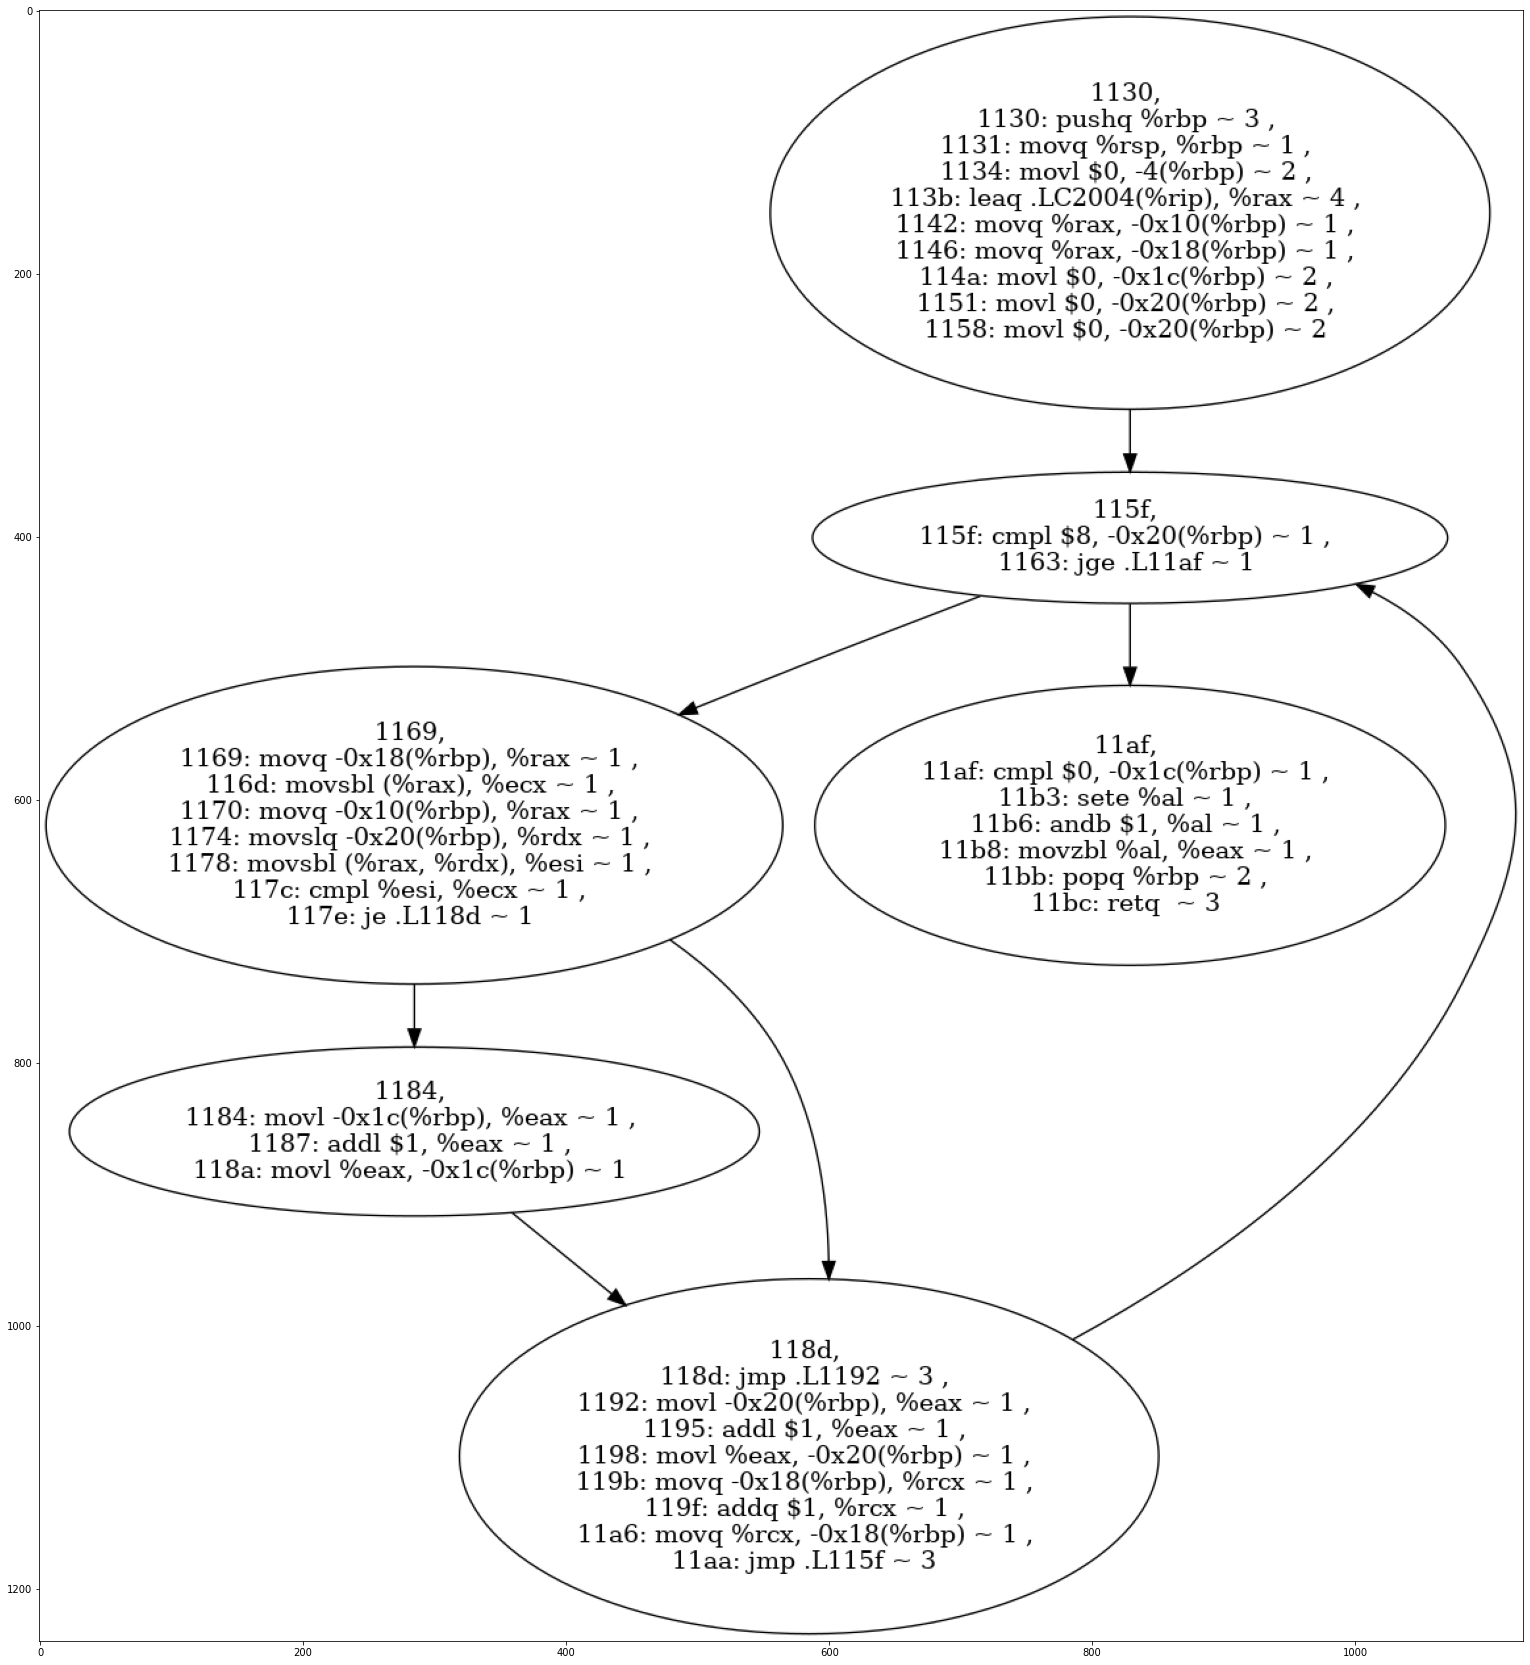

In [4]:
%autoreload 2
import copy
from rwtools.nemesis.graph.utils import create_graph_structure
from rwtools.nemesis.graph.utils import to_img
from rwtools.nemesis.graph.balance import balance_branching_point, balance_node_latencies
from rwtools.nemesis.graph.nemesis_node import NemesisNode
from rwtools.nemesis.nop_instructions import get_nop_instruction
from rwtools.nemesis.control_flow_graph import is_branching_instruction
from librw.container import InstructionWrapper
from librw.analysis.register import RegisterAnalysis
from librw.analysis.stackframe import StackFrameAnalysis



outputfile = "./equal_2.s"
loader, rw = setup(binary, outputfile)

# function_names = loader.container.function_names



nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(1, figsize=(30, 30))

cfg = ControlFlowGraph(nodes=nodes, graph=graph)

cfg.merge_consecutive_nodes()

# cfg.merge_inserted_nodes()
axs.imshow(cfg.to_img())

rw.dump()

In [10]:


outputfile = "./equal_2.s"
loader, rw = setup(binary, outputfile)
RegisterAnalysis.analyze(loader.container)

main_function = None
for addr, function in loader.container.functions.items():
    if function.name == "main":
        main_function = function 
        
free_registers = main_function.analysis['free_registers']
clobber_registers = main_function.analysis['clobber_registers']

print(clobber_registers)

# convert these into format the balancing algorithm can use 

new_free_registrs = {}
for idx, wrapper in enumerate(function.cache):
    new_free_registrs[function.cache[idx]] = free_registers[idx]
    

# # for idx, wrapper in enumerate(function.cache):
# #         print(wrapper)
        
        
        


# for addr, function in loader.container.functions.items():
#     if function.name != "main":
#         continue
#     print(function.name)
#     free_registers = function.analysis['free_registers']
    
# #     for item, value in free_registers.items():
# #         print(item, value)
# #     print(function.analysis['free_registers'])
    
# test_instruction = cfg.get_node('1130').instruction_wrappers[3]
# print(test_instruction)

# def get_instruction_idx(cache, instruction):
#     for idx, i_wrapper in enumerate(main_function.cache):
#         if i_wrapper.address == instruction.address:
#             return idx
            

        
# # idx = main_function.cache.index(test_instruction)

# # # test_instruction.idx
# # idx = get_instruction_idx(main_function.cache, test_instruction)
# # free_registers = free_registers[idx]
# # print(free_registers)

# for idx, wrapper in enumerate(main_function.cache):
#     print(wrapper, free_registers[idx])

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
{'r13', 'rdi', 'r8', 'rbx', 'r14', 'r12', 'r15', 'r11', 'r10', 'rsi', 'r9'}
